In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 13 ADVANCED CLASSIFICATION DAY2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [6]:
#=================================================-
#### Slide 2: Directory settings  ####

# Set `main_dir` to the location of your `af-werx` folder (for Linux).
#main_dir = "/home/Datascience/Desktop/af-werx"
# Set `main_dir` to the location of your `af-werx` folder (for Mac).
main_dir = '/Users/datasociety/Desktop/af-werx'
# Set `main_dir` to the location of your `af-werx` folder (for Windows).
#main_dir = "C:\\Users\\[username]\\Desktop\\af-werx"
# Make `data_dir` from the `main_dir` and
# remainder of the path to data directory.
data_dir = main_dir + "/data"



In [7]:
#=================================================-
#### Slide 3: Loading packages  ####

import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.legend_handler import HandlerLine2D

# New today
from sklearn.model_selection import RandomizedSearchCV



In [8]:
#=================================================-
#### Slide 4: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())



/Users/datasociety/Desktop/af-werx/data


In [10]:
#=================================================-
#### Slide 10: Load the cleaned dataset  ####

os.chdir(data_dir)
costa_clean = pickle.load(open("costa_no_hc.sav","rb"))
costa_clean.head()



,rooms,tablet,males_under_12,males_over_12,females_under_12,females_over_12,years_of_schooling,wall_block_brick,wall_socket,wall_prefab_cement,...,num_mobilephones,region_central,region_Chorotega,region_pacifico,region_brunca,region_antlantica,region_huetar,urban_zone,age,Target
0,3,0,0,1,0,0,10,1,0,0,...,1,1,0,0,0,0,0,1,43,True
1,4,1,0,1,0,0,12,0,0,0,...,1,1,0,0,0,0,0,1,67,True
2,8,0,0,0,0,1,11,0,0,0,...,0,1,0,0,0,0,0,1,92,True
3,5,1,0,2,1,1,9,1,0,0,...,3,1,0,0,0,0,0,1,17,True
4,5,1,0,2,1,1,11,1,0,0,...,3,1,0,0,0,0,0,1,37,True


In [11]:
#=================================================-
#### Slide 11: Print info on data  ####

costa_clean.columns



Index(['rooms', 'tablet', 'males_under_12', 'males_over_12',
       'females_under_12', 'females_over_12', 'years_of_schooling',
       'wall_block_brick', 'wall_socket', 'wall_prefab_cement', 'wall_wood',
       'floor_mos_cer_terr', 'floor_wood', 'ceiling', 'electric_public',
       'toilet_sewer', 'cookenergy_elec', 'trash_truck', 'wall_bad',
       'wall_reg', 'roof_bad', 'roof_reg', 'floor_bad', 'floor_reg',
       'disabled_ppl', 'male', 'under10', 'free', 'married', 'separated',
       'single', 'hh_head', 'hh_spouse', 'hh_child', 'num_65plus',
       'dependency_rate', 'male_hh_head_educ', 'female_hh_head_educ',
       'meaneduc', 'educ_primary_inc', 'educ_primary', 'educ_secondary_inc',
       'educ_secondary', 'educ_undergrad', 'ppl_per_room', 'house_owned_full',
       'house_owned_paying', 'house_rented', 'house_other', 'computer',
       'television', 'num_mobilephones', 'region_central', 'region_Chorotega',
       'region_pacifico', 'region_brunca', 'region_antlantica',
 

In [16]:
#=================================================-
#### Slide 12: Split into training and test sets  ####

# Select the predictors and target.
X = costa_clean.drop(['Target'], axis = 1)
y = np.array(costa_clean['Target'])

# Set the seed to 1.
np.random.seed(1)

# Split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



In [17]:
#=================================================-
#### Slide 13: Tuning random forest model  ####

forest = pickle.load(open("model_forest.sav","rb"))
forest.get_params()



{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [19]:
#=================================================-
#### Slide 16: Parameter grid  ####

# Number of trees in random forest.
n_estimators = [int(x) for x in np.linspace(start = 200, 
                                            stop = 2000, 
                                            num = 10)]

# Number of features to consider at every split.
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None) # default

# Minimum number of samples required to split a node.
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 4]

# Create the random grid.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [20]:
#=================================================-
#### Slide 17: Set up cross-validation function  ####
from sklearn.model_selection import ShuffleSplit
rf_random = RandomizedSearchCV(estimator = forest, 
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3, 
                               verbose = 0,
                               random_state = 1, 
                               n_jobs = -1)

# Fit the random search model.
rf_random.fit(X_train, y_train)
rf_random.best_params_



KeyboardInterrupt: 

In [24]:
#=================================================-
#### Slide 18: Optimized random forest model  ####

optimized_forest = RandomForestClassifier(criterion = 'gini',
                                          n_estimators = 1000,
                                          min_samples_split = 5,
                                          min_samples_leaf = 2,
                                          max_features = 'sqrt',
                                          max_depth = 10,
                                          random_state = 1)
optimized_forest.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [ ]:
#=================================================-
#### Slide 20: Exercise 1  ####





In [25]:
#=================================================-
#### Slide 22: Predict using the best model parameters  ####

optimized_forest_y_predict = optimized_forest.predict(X_test)
# Look at the first few predictions.
print(optimized_forest_y_predict[0:5, ])
optimized_forest_accuracy = metrics.accuracy_score(y_test, optimized_forest_y_predict)
print ("Accuracy on test data (best model): ", optimized_forest_accuracy)



[ True  True  True  True  True]
Accuracy on test data (best model):  0.8535564853556485


In [26]:
#=================================================-
#### Slide 23: Optimized random forest: save final accuracy  ####

model_final_optimized = pickle.load(open("model_final_forest_gbm.sav","rb"))



In [27]:
#=================================================-
#### Slide 24: Optimized random forest: save final accuracy  ####

# Add the model to our dataframe.
model_final_optimized = model_final_optimized.append({'metrics' : "accuracy" ,
'values' : round(optimized_forest_accuracy, 4),
'model':'optimized forest' } ,
ignore_index = True)
print(model_final_optimized)



     metrics  values                   model
0   accuracy  0.6046                   knn_5
1   accuracy  0.6188        knn_GridSearchCV
2   accuracy  0.6287                  knn_29
3   accuracy  0.6287                  knn_29
4   accuracy  0.6356                logistic
5   accuracy  0.7845  logistic_whole_dataset
6   accuracy  0.7859          logistic_tuned
7   accuracy  0.6611      tree_simple_subset
8   accuracy  0.9407      tree_all_variables
9   accuracy  0.9372           random forest
10  accuracy  0.8644                boosting
11  accuracy  0.8536        optimized forest


In [ ]:
#=================================================-
#### Slide 26: Exercise 2  ####





In [39]:
#=================================================-
#### Slide 32: Define an optimal number function  ####

# Define function that will determine the optimal number for each parameter.
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    best_value = values[best_test_index]
    return(best_value)



In [40]:
#=================================================-
#### Slide 33: Optimize: learning rate  ####

# Learning Rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []


for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    train_results.append(acc_train)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    test_results.append(acc_test)

optimal_learning_rate = optimal_parameter(learning_rates, test_results)



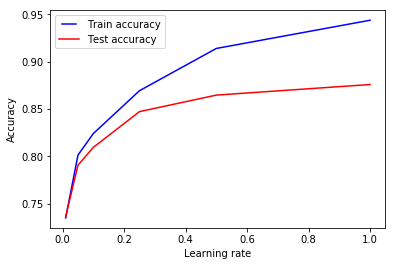

In [41]:
#=================================================-
#### Slide 34: Plot: learning rate  ####

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results,'b', label= "Train accuracy")
line2, = plt.plot(learning_rates, test_results, 'r', label= "Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()



In [42]:
#=================================================-
#### Slide 35: Optimize: n estimators  ####

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    train_results.append(acc_train)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    test_results.append(acc_test)

optimal_n_estimators = optimal_parameter(n_estimators, test_results)



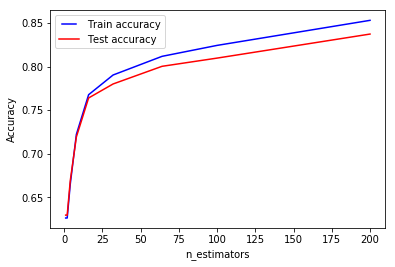

In [43]:
#=================================================-
#### Slide 36: Plot: n estimators  ####

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(n_estimators, test_results, 'r', label= "Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()



In [33]:
#=================================================-
#### Slide 37: Optimize: max depth  ####

# Max depth:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    train_results.append(acc_train)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    test_results.append(acc_test)

# Store optimal max_depth.
optimal_max_depth = optimal_parameter(max_depths, test_results)



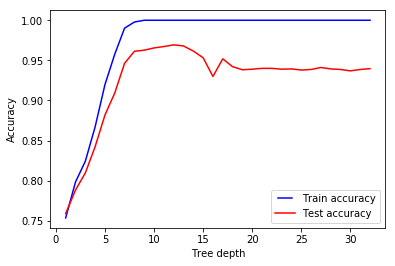

In [34]:
#=================================================-
#### Slide 38: Plot: max depth  ####

# Plot max depth over 1-32.
line1, = plt.plot(max_depths, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label= "Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()



In [44]:
#=================================================-
#### Slide 39: Optimize: min samples split  ####

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split = min_samples_split)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    train_results.append(acc_train)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    test_results.append(acc_test)

    # Store optimal min_samples_split.
optimal_min_samples_split = optimal_parameter(min_samples_splits, test_results)



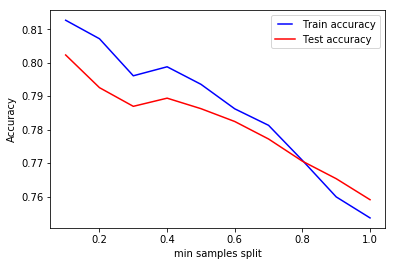

In [45]:
#=================================================-
#### Slide 40: Plot: min samples split  ####

line1, = plt.plot(min_samples_splits, train_results, 'b', label = "Train accuracy")
line2, = plt.plot(min_samples_splits, test_results, 'r', label = "Test accuracy")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples split')
plt.show()



In [46]:
#=================================================-
#### Slide 41: Optimize: min samples leaf  ####

# Min_samples_leaf:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf = min_samples_leaf)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    train_results.append(acc_train)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    test_results.append(acc_test)


optimal_min_samples_leafs = optimal_parameter(min_samples_leafs, test_results)



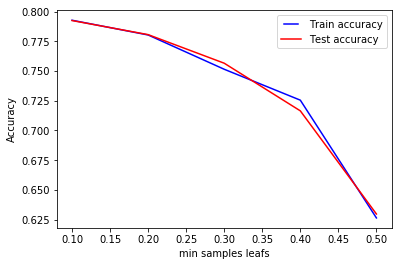

In [47]:
#=================================================-
#### Slide 42: Plot: min samples leaf  ####

line1, = plt.plot(min_samples_leafs, train_results, 'b', label = "Train accuracy")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label = "Test accuracy")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples leafs')
plt.show()



In [48]:
#=================================================-
#### Slide 43: Optimize: max features  ####

# Max_features:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    model = GradientBoostingClassifier(max_features = max_feature)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    # Add acc score to previous train results.
    train_results.append(acc_train)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    # Add acc score to previous test results.
    test_results.append(acc_test)

optimal_max_features = optimal_parameter(max_features, test_results)



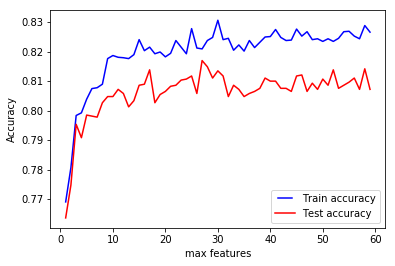

In [49]:
#=================================================-
#### Slide 44: Plot: max features  ####

line1, = plt.plot(max_features, train_results, 'b', label = "Train accuracy")
line2, = plt.plot(max_features, test_results, 'r', label = "Test accuracy")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('max features')
plt.show()



In [50]:
#=================================================-
#### Slide 45: Optimized model  ####

print("The optimal learning rate is:", optimal_learning_rate)
print("The optimal number of estimators is:", optimal_n_estimators)
print("The optimal max depth is:", optimal_max_depth)
print("The optimal min samples split is:", optimal_min_samples_split)
print("The optimal min samples leaf is:", optimal_min_samples_leafs)
print("The optimal max features is:", optimal_max_features)



The optimal learning rate is: 1
The optimal number of estimators is: 200
The optimal max depth is: 12.0
The optimal min samples split is: 0.1
The optimal min samples leaf is: 0.1
The optimal max features is: 27


In [ ]:
#=================================================-
#### Slide 47: Exercise 3  ####





In [ ]:
#=================================================-
#### Slide 49: Build optimized model  ####

# Set the seed.
np.random.seed(1)

# Implement the decision tree on X_train.
gbm_optimized = GradientBoostingClassifier(learning_rate = optimal_learning_rate,
                                           n_estimators = optimal_n_estimators,
                                           max_depth = optimal_max_depth,
                                           min_samples_split = optimal_min_samples_split,
                                           min_samples_leaf = optimal_min_samples_leafs,
max_features = optimal_max_features)

# We can now see our optimized features where before they were just default:
print(gbm_optimized)

gbm_optimized_fit = gbm_optimized.fit(X_train, y_train)



In [ ]:
#=================================================-
#### Slide 50: Predict with optimized model  ####

# Predict on X_test.
y_predict_gbm_optimized = gbm_optimized.predict(X_test)

# Accuracy score.
acc_score_gbm_optimized = accuracy_score(y_test, y_predict_gbm_optimized)

print(acc_score_gbm_optimized)



In [ ]:
#=================================================-
#### Slide 51: Add accuracy score to the final scores  ####

model_final_optimized = model_final_optimized.append({'metrics' : "accuracy" ,
'values' : round(acc_score_gbm_optimized,4),
'model':'gbm_optimized'} ,
ignore_index = True)
print(model_final_optimized)



In [ ]:
#=================================================-
#### Slide 53: Final scores  ####

print(model_final_optimized)
pickle.dump(model_final_optimized, open("model_final_optimized_ensemble.sav", "wb" ))

